<a href="https://colab.research.google.com/github/chocozzang/My_Python_Practice/blob/main/%EC%9E%91%EC%97%85_1%EC%9C%A0%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

유튜브 인기동영상 데이터

데이터 출처 :https://www.kaggle.com/rsrishav/youtube-trending-video-dataset?select=KR_youtube_trending_data.csv

데이터 설명 : 유튜브 데일리 인기동영상 (한국)
dataurl : https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv

In [ ]:
import pandas as pd
pd.set_option('mode.chained_assignment',  None)
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv", index_col = 0)
df.head()

,title,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channelId,trending_date2
0,[신병] 물자창고,장삐쭈,23,1893473,38249,730,8595,UChbE5OZQ6dRHECsX0tEPEZQ,2021-01-01
1,RAIN(비) - 나로 바꾸자 Switch to me (duet with JYP) MV,RAIN's Official Channel,10,2600864,0,0,20129,UCxXgIeE5hxWxHG6dz9Scg2w,2021-01-01
2,2020년 제야의 종 온라인 타종행사 | 보신각 현장 행사는 진행하지 않습니다.,서울시 · Seoul,29,347049,3564,120,178,UCZUPZW5idAxYp-Asj__lVAA,2021-01-01
3,고기남자의 칠면조 파티,고기남자 MeatMan,26,528458,15372,280,3470,UCT3CumbFIJiW33uq0UI3zlg,2021-01-01
4,골목 3mc를 분노하게 만든 마음고생이 심했을 공릉 백반집 사장님의 푸념?! [예능...,스브스밥집,24,494904,3918,111,3142,UCdWgRSfttvDucq4ApcCg5Mw,2021-01-01


index_col = 0을 read_csv의 변수로 넣어주면, unnamed : 0 열 없이 출력할 수 있다.

In [ ]:
result1 = df.loc[df.channelId.isin(df.channelId.value_counts().head(10).index)].channelTitle.unique().tolist()

print(result1)

['장삐쭈', '총몇명', '파뿌리', '짤툰', '런닝맨 - 스브스 공식 채널', '엠뚜루마뚜루 : MBC 공식 종합 채널', 'SPOTV', '채널 십오야', '이과장', 'BANGTANTV']


(열 이름).value_counts => 열의 값의 개수를 각각 계산
즉, 같은 channelId를 가진다면 같은 채널에서 제작한 영상이라 볼 수 있음. 
또한, 제작한 영상의 수 역시 계산할 수 있음.

In [ ]:
result2 = df.loc[df['dislikes'] > df['likes']].channelTitle.unique().tolist()

print(result2)

['핫도그TV', 'ASMR 애정TV', '하얀트리HayanTree', '양팡 YangPang', '철구형 (CHULTUBE)', '왜냐맨하우스', '(MUTUBE)와꾸대장봉준', '오메킴TV', '육지담', 'MapleStory_KR', 'ROAD FIGHTING CHAMPIONSHIP', '사나이 김기훈', '나혼자산다 STUDIO', 'Gen.G esports']


조건에 맞는 행을 찾고자 한다면 df.loc[조건식]을 통해 찾을 수 있다.

In [ ]:
result3 = (df.drop_duplicates(subset = "channelTitle").channelId.value_counts() > 1).values.tolist().count(True)

print(result3)

71


drop_duplicate는 특정 열이 값이 같을 때 다른 열의 값이 몇 종류 인지를 셀 수 있도록 하는 메소드이다.

.values를 통해 해당 값들을 array로 받을 수 있다.

In [ ]:
df['trending_date2'] = pd.to_datetime(df['trending_date2'])
(df.loc[df['trending_date2'].dt.weekday == 6].categoryId.value_counts()).sort_values(ascending = False).index[0]

24

.dt.weekday를 사용하려면 판다스에서 해당 날짜 형식을 pd.to_datetime을 이용하여 변경하여야 한다.

In [ ]:
df.groupby(['categoryId', df['trending_date2'].dt.day_name()]).size().unstack()

trending_date2,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
categoryId,,,,,,,
1,243,263,255,274,246,257,234
2,120,105,119,99,128,119,129
10,833,837,776,830,890,894,917
15,187,215,198,217,207,208,207
17,633,668,592,636,682,708,706
19,90,92,87,91,92,89,85
20,283,298,296,289,282,285,291
22,1288,1373,1289,1337,1341,1375,1333
23,568,594,570,556,560,569,566


dataFrame을 unstack하게 되면 데이터 프레임을 더 보기 쉽게 만들어 줄 수 있다.

In [ ]:
df2 = df.loc[df['view_count'] > 0]
df3 = df2.loc[(df2['comment_count'] / df2['view_count']) > 0]
df3['temp'] = df3['comment_count'] / df3['view_count']
df3_sorted = df3.sort_values(by='temp', ascending=False)
result6 = (df3_sorted.title.tolist())[0]
print(result6)

60분 동안 댓글이 달리지 않으면, 영상이 삭제됩니다. (챌린지)


In [ ]:
df3_sorted_reversed = df3.sort_values(by='temp')
result7 = df3_sorted_reversed.title.tolist()
print(result7[0])

Join the BTS #PermissiontoDance Challenge only on YouTube #Shorts


In [ ]:
df4 = df.loc[(df['likes'] != 0) & (df['dislikes'] != 0)]
df4['temp'] = df4['dislikes'] / df4['likes']
df4_sorted_reversed = df4.sort_values(by='temp')
result8 = df4_sorted_reversed.title.tolist()
print(result8[0])

[줌터뷰] *최초공개* 사부작즈🐰🐶의 비공식 이름은 아이라인즈? 꿀조합 티키타카 가득한 NCT 127 도영&정우의 줌터뷰


In [ ]:
result9 = (df.loc[df.channelId == (df.channelId.value_counts().index.tolist())[0]].channelTitle.unique().tolist())[0]
print(result9)

짤툰


In [ ]:
result10 = (df[['title', 'channelId']].value_counts() >= 20).values.tolist().count(True)
print(result10)

40


유튜브 공범컨텐츠 동영상 데이터

데이터 출처 :https://www.kaggle.com/kukuroo3/youtube-episodic-contents-kr(참고, 데이터 수정)

데이터 설명 : 유튜브 “공범” 컨텐츠 동영상 정보 ( 10분 간격 수집)

dataurl1 (비디오 정보) = https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv

dataurl2 (참가자 채널 정보)= https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv

In [ ]:
import pandas as pd

pd.set_option('mode.chained_assignment',  None)

channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')
display(channel.head())
display(video.head())

,channelid,subcnt,viewcnt,videocnt,ct,channelname
0,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,410238653,736,2021-09-30 03:01:03,꽈뚜룹
1,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,736,2021-09-30 09:01:03,꽈뚜룹
2,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,735,2021-09-30 15:01:03,꽈뚜룹
3,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,737,2021-09-30 21:01:03,꽈뚜룹
4,UCkQCwnkQfgSuPTTnw_Y7v7w,1320000,412531322,737,2021-10-01 03:01:04,꽈뚜룹


,videopk,viewcnt,likecnt,dislikecnt,favoritecnt,cmcnt,ct,videoname
0,c5JQp6xafqc,1667010,30474,706,0,6587,2021-10-10 15:20:03,공범 EP1
1,c5JQp6xafqc,1669089,30495,707,0,6589,2021-10-10 15:30:03,공범 EP1
2,c5JQp6xafqc,1674759,30522,711,0,6596,2021-10-10 15:40:02,공범 EP1
3,c5JQp6xafqc,1677026,30555,712,0,6604,2021-10-10 15:50:03,공범 EP1
4,c5JQp6xafqc,1681824,30585,713,0,6600,2021-10-10 16:00:03,공범 EP1


In [ ]:
channel['ct'] = pd.to_datetime(channel['ct'])
video['ct'] = pd.to_datetime(channel['ct'])

video.videoname.value_counts()

 공범 EP1    3492
 공범 EP2    3204
 공범 EP3    2568
 공범 EP4    2280
 공범 EP5    1562
 공범 EP6    1274
 공범 EP7     555
 공범 EP8     266
Name: videoname, dtype: int64

In [ ]:
df5 = video[['viewcnt', 'videoname', 'ct']].sort_values(by=['videoname', 'ct'], na_position="first", ignore_index = True).drop_duplicates(subset="videoname", keep="last")
df5.reset_index(drop = True)

,viewcnt,videoname,ct
0,3180532,공범 EP1,2021-11-01 15:30:03
1,2199328,공범 EP2,2021-11-01 15:30:03
2,1671294,공범 EP3,2021-11-01 15:30:03
3,1818493,공범 EP4,2021-11-01 15:30:03
4,1503435,공범 EP5,2021-11-01 15:30:04
5,1750222,공범 EP6,2021-11-01 15:30:04
6,1630200,공범 EP7,2021-11-01 15:30:05
7,1289088,공범 EP8,2021-11-01 15:30:05


새로 정의한 데이터프레임의 인덱스를 초기화하려면, reset_index(drop = True)로 수행하면 된다.

In [ ]:
channel['ct'] = pd.to_datetime(channel['ct'])
df6 = channel.loc[channel['ct'] >= pd.to_datetime("2021-10-03")]
result13 = df6[['channelname', 'ct', 'subcnt']].sort_values(by=['channelname', 'ct'], na_position="first").drop_duplicates(subset="channelname", keep="first")
print(result13[['channelname', 'subcnt']].reset_index(drop = True))

        channelname   subcnt
0     Balming Tiger    54300
1     곽토리 kwak tori   471000
2        김농밀의 농밀한 삶     7520
3               꽈뚜룹  1330000
4            논리왕 전기   922000
5       릴펄 Lilpearl    10100
6             야전삽짱재   257000
7   와글와글 WagleWagle    55000
8               조나단   215000
9        츄정ChuJeong   322000
10          형사!탐정되다    14900


In [ ]:
df7 = channel.loc[(channel['ct'] >= pd.to_datetime("2021-10-03 03:00:00")) & (channel['ct'] <= pd.to_datetime("2021-11-01 15:00:00"))]

df7_first = df7[['channelname', 'ct', 'subcnt']].sort_values(by=["channelname", "ct"]).drop_duplicates(subset="channelname", keep = "first")
df7_last  = df7[['channelname', 'ct', 'subcnt']].sort_values(by=["channelname", "ct"]).drop_duplicates(subset="channelname", keep = "last")
df7_merge = pd.merge(df7_first, df7_last, on='channelname')
df7_merge['del'] = df7_merge['subcnt_y'] - df7_merge['subcnt_x']

result14 = df7_merge[['channelname', 'del']]
display(result14)

,channelname,del
0,Balming Tiger,2500
1,곽토리 kwak tori,-2000
2,김농밀의 농밀한 삶,1540
3,꽈뚜룹,70000
4,논리왕 전기,-11000
5,릴펄 Lilpearl,11000
6,야전삽짱재,11000
7,와글와글 WagleWagle,0
8,조나단,12000
9,츄정ChuJeong,1000


pd.merge(병합할 데이터프레임들, on="기준열")로 여러 데이터프레임을 하나의 데이터프레임으로 병합할 수 있다.

---



In [ ]:
import datetime

df8 = video.loc[video["videoname"].str.contains("EP1")]

df8['ct'] = pd.to_datetime(df8['ct'])

df8_sort = df8.sort_values(by="ct")

df8_sort.loc[(df8_sort.ct.diff(1) >= datetime.timedelta(minutes=20))
            |(df8_sort.ct.diff(1) <= datetime.timedelta(minutes=5))]

result15 = df8_sort.iloc[[720, 721, 722, 723, 1635, 1636, 1637]]
display(result15)

<ipython-input-119-dcce2a4e6f13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['ct'] = pd.to_datetime(df8['ct'])


,videopk,viewcnt,likecnt,dislikecnt,favoritecnt,cmcnt,ct,videoname
720,c5JQp6xafqc,2153676,34104,830,0,7120,2021-10-12 19:20:03,공범 EP1
721,c5JQp6xafqc,2228250,34559,849,0,7191,2021-10-13 09:41:37,공범 EP1
722,c5JQp6xafqc,2228250,34559,849,0,7191,2021-10-13 09:41:37,공범 EP1
723,c5JQp6xafqc,2228669,34566,849,0,7194,2021-10-13 09:50:03,공범 EP1
1635,c5JQp6xafqc,2706691,37893,987,0,7410,2021-10-19 17:50:02,공범 EP1
1636,c5JQp6xafqc,2707933,37901,988,0,7410,2021-10-19 18:20:03,공범 EP1
1637,c5JQp6xafqc,2708448,37903,988,0,7410,2021-10-19 18:30:03,공범 EP1


diff(n) : 위의 n번째 행의 값과의 비교를 진행한다.

datetime.timedelta() : datetime에 대해서 년/월/일/시간/분/초 간의 비교가 가능하다

df.iloc[행 번호] : 해당 행 번호의 행을 다 가져옴

In [ ]:
import datetime

df9 = video.sort_values(by=["videoname", "ct"]).drop_duplicates(subset="videoname", keep="first")

result16 = df9[['ct','videoname']]
result16.rename(columns = {'ct' : 'date'}, inplace = True)
result16['date'] = pd.to_datetime(result16['date'])

result16['date'] = result16['date'].dt.strftime("%Y-%m-%d")

display(result16)

,date,videoname
10,2021-10-07,공범 EP1
3496,2021-10-09,공범 EP2
6696,2021-10-14,공범 EP3
9264,2021-10-16,공범 EP4
11544,2021-10-21,공범 EP5
13661,2021-10-23,공범 EP6
13106,2021-10-28,공범 EP7
14935,2021-10-30,공범 EP8


rename(columns = {'이전' : '이후'}, inplace=바로대체할것인지 유무)

datetime열.dt.strftime(변경할 datetime형식)

In [ ]:
video['ct'] = pd.to_datetime(video['ct'])

df10 = video.sort_values(by=['videoname', 'ct'])

df11 = df10.drop_duplicates(subset="videoname", keep="first")

df12 = pd.merge(df10, df11, on="videoname")

df12 = df12.loc[(df12.ct_x.dt.year == df12.ct_y.dt.year) & (df12.ct_x.dt.month == df12.ct_y.dt.month) & (df12.ct_x.dt.day == df12.ct_y.dt.day)
        & (df12.ct_x.dt.hour == 21) &(df12.ct_x.dt.minute == 0)].sort_values(by=['videoname', 'ct_x']).drop_duplicates(subset="videoname")

result17 = df12[['videoname', 'viewcnt_x', 'ct_x']]
result17.rename(columns = {'viewcnt_x' : 'view_cnt', 'ct_x' : 'ct'}, inplace = True)
result17 = result17.sort_values(by="view_cnt", ascending=False).reset_index(drop = True)

display(result17)

,videoname,view_cnt,ct
0,공범 EP8,264029,2021-10-30 21:00:08
1,공범 EP7,252032,2021-10-28 21:00:04
2,공범 EP4,217674,2021-10-16 21:00:04
3,공범 EP6,213899,2021-10-23 21:00:06
4,공범 EP5,201179,2021-10-21 21:00:04
5,공범 EP2,148144,2021-10-09 21:00:03
6,공범 EP3,147183,2021-10-14 21:00:04
7,공범 EP1,117340,2021-10-07 21:00:03


In [ ]:
video['ct'] = pd.to_datetime(video['ct'])

df13 = video.sort_values(by=['videoname', 'ct']).drop_duplicates(subset="videoname", keep="last")

df13['ratio'] = df13['dislikecnt'] / df13['likecnt']

result18 = df13[['videoname', 'ratio']].sort_values(by="ratio").reset_index(drop = True)

display(result18)

,videoname,ratio
0,공범 EP7,0.013636
1,공범 EP6,0.015881
2,공범 EP4,0.017971
3,공범 EP5,0.021128
4,공범 EP3,0.022360
5,공범 EP1,0.027118
6,공범 EP2,0.029844
7,공범 EP8,0.141357


In [ ]:
video['ct'] = pd.to_datetime(video['ct'])

df14 = video.loc[(video.ct >= pd.to_datetime("2021-11-01 00:00:00")) & (video.ct <= pd.to_datetime("2021-11-01 15:00:00"))]
df14.sort_values(by=["videoname", "ct"])

df14_first = df14.drop_duplicates(subset="videoname", keep="first")
df14_last = df14.drop_duplicates(subset="videoname", keep="last")

df14_merge = pd.merge(df14_first, df14_last, on="videoname")
df14_merge['viewcnt'] = df14_merge['viewcnt_y'] - df14_merge['viewcnt_x']

result19 = df14_merge[['videoname', 'viewcnt']].set_index(keys='videoname')
display(result19)


,viewcnt
videoname,
공범 EP1,13298
공범 EP2,10300
공범 EP3,9927
공범 EP4,9824
공범 EP5,10824
공범 EP7,26949
공범 EP6,14141
공범 EP8,89147


열을 인덱스로 설정하려면, df.set_index(keys='열의 이름') 여러개라면 ['열의 이름1', '열의 이름2', ...]로 설정함

In [ ]:
video['ct'] = pd.to_datetime(video['ct'])

df15 = video

result20 = df15.loc[df15.index.isin(set(df15.index) - set(df15.drop_duplicates().index))]

display(result20[['videoname', 'ct']])

,videoname,ct
722,공범 EP1,2021-10-13 09:41:37
3927,공범 EP2,2021-10-13 09:41:37


중복되는 데이터가 있는지를 확인하려면

index 전체를 set으로 만들고,
drop_duplicates를 통해 중복을 제거한 index들을 set으로 만들어 
두 set 간의 차집합을 구하면 중복된 데이터들을 확인할 수 있다.

월드컵 출전선수 골기록 데이터

데이터 출처 :https://www.kaggle.com/darinhawley/fifa-world-cup-goalscorers-19302018(참고, 데이터 수정)

데이터 설명 : 1930 ~2018년도 월드컵 출전선수 골기록

data url = https://raw.githubusercontent.com/Datamanim/datarepo/main/worldcup/worldcupgoals.csv

In [ ]:
import pandas as pd
pd.set_option('mode.chained_assignment',  None)
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/worldcup/worldcupgoals.csv')
df.head()

,Player,Goals,Years,Country
0,Miroslav Klose,16,2002-2006-2010-2014,Germany
1,Ronaldo,15,1998-2002-2006,Brazil
2,Gerd Muller,14,1970-1974,Germany
3,Just Fontaine,13,1958,France
4,Pele,12,1958-1962-1966-1970,Brazil


In [ ]:
df16 = df[['Country', 'Goals']].groupby("Country").sum().sort_values(by="Goals", ascending=False)
display(df16.head(5))

,Goals
Country,
Brazil,228
Germany,226
Argentina,135
Italy,123
France,115


In [ ]:
df17 = df[['Country']]

display(df17.value_counts().sort_values(ascending=False).head(5))

Country  
Brazil       81
Germany      78
Italy        60
Argentina    59
France       58
dtype: int64

In [ ]:
df['Year_Split'] = df['Years'].str.split('-')

def check(mystr):
    check = False
    for year2 in mystr:
        if len(year2) != 4 :
            check = True
            return check
    return check

len(df.loc[df['Year_Split'].apply(check)])

45

In [ ]:
df2 = df.loc[df.index.isin(set(df.index) - set(df.loc[df['Year_Split'].apply(check)].index))]

len(df2)

1250

각 열에 대해서 함수를 적용하고 싶다면, apply(함수명)으로 활용하면 된다.

In [ ]:
def count_year(mystr2):
    return len(mystr2)

df2['LenCup'] = df2['Year_Split'].apply(count_year)

result25 = df2.loc[df2.LenCup == 4]

print(len(result25))

16


In [ ]:
result26 = df2.loc[(df2.Country == "Yugoslavia") & (df2.LenCup == 2)]
print(len(result26))

7


In [ ]:
def have_2002(year):
    if("2002" in year):
      return True
    else:
      return False

result27 = df2.loc[df2.Year_Split.apply(have_2002)]

print(len(result27))

156


In [ ]:
df2['PlayerUpper'] = df2.Player.str.upper()

result28 = df2.loc[df2.PlayerUpper.str.contains("CARLOS")]

print(len(result28))

13


In [ ]:
result29 = df2.loc[df2.LenCup == 1]

result29 = result29.sort_values(by="Goals", ascending=False)

print(result29.Player.values.tolist()[0])

Just Fontaine


In [ ]:
result30 = df2.loc[df2.LenCup == 1]

display(result30.Country.value_counts().index[0])

#display(result30[['Player', 'Country']].groupby("Country").count().sort_values(by = "Player", ascending = False).index.tolist()[0])

'Brazil'

서울시 따릉이 이용정보 데이터

데이터 출처 :https://www.data.go.kr/data/15051872/fileData.do(참고, 데이터 수정)

데이터 설명 : 서울특별시_공공자전거 시간대별 이용정보

data url = https://raw.githubusercontent.com/Datamanim/datarepo/main/bicycle/seoul_bi.csv

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/bicycle/seoul_bi.csv')
df.head()

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-06-01,0,3541,정기권,F,~10대,1,0.00,0.00,0.00,8
1,2021-06-01,0,765,정기권,F,~10대,1,27.21,0.35,1526.81,19
2,2021-06-01,0,2637,정기권,F,~10대,1,41.40,0.37,1608.56,18
3,2021-06-01,0,2919,정기권,F,~10대,1,0.00,0.00,0.00,75
4,2021-06-01,0,549,정기권,F,~10대,1,13.04,0.17,731.55,6


In [ ]:
result31 = df["대여일자"].value_counts().sort_index().to_frame()

display(result31)
display(result31["대여일자"].sort_values(ascending = False).index[0])

,대여일자
2021-06-01,48081
2021-06-02,56100
2021-06-03,18985
2021-06-04,56788
2021-06-05,52730
2021-06-06,47787
2021-06-07,52623
2021-06-08,55623
2021-06-09,54507
2021-06-10,36992


'2021-06-04'

In [ ]:
df["대여일자"] = pd.to_datetime(df["대여일자"])

df["day_name"] = df["대여일자"].dt.day_name()

df.day_name.value_counts().to_frame()

,day_name
Wednesday,110607
Friday,108877
Monday,107568
Tuesday,103704
Saturday,101299
Sunday,90918
Thursday,55977


In [ ]:
df.groupby(["day_name", "대여소번호"]).size().to_frame("size").reset_index().sort_values(by = "size", ascending=False).drop_duplicates(subset="day_name", keep="first").reset_index(drop=True)

,day_name,대여소번호,size
0,Saturday,502,378
1,Sunday,502,372
2,Wednesday,502,282
3,Friday,502,277
4,Tuesday,502,267
5,Monday,502,242
6,Thursday,2715,137


groupby.size.to_frame("원하는이름")으로 하면 그룹별 카운팅을 한 값이 원하는 이름 열로 지정된다.
또한, groupby로 묶인 그룹들을 reset_index를 통해 다시 데이터프레임화 할 수 있다.

In [ ]:
df['onedayorlong'] = df['대여구분코드'].isin({"일일권", "일일권(비회원)"})

result34 = df[["연령대코드", "onedayorlong"]].value_counts().to_frame("count").reset_index().sort_values(by="연령대코드")

result34_true = result34.loc[result34["onedayorlong"] == True]
result34_false = result34.loc[result34["onedayorlong"] == False]
result34_merge = pd.merge(result34_true, result34_false, on="연령대코드")
result34_merge["ratio"] = result34_merge["count_x"] / result34_merge["count_y"] 

result34_total = result34_merge[["연령대코드", "ratio"]]
result34_total = result34_total.sort_values(by="ratio", ascending = False)

print(result34_total)

print("max ratio age " + result34_total.values[0][0])

  연령대코드     ratio
6  ~10대  0.454599
0   20대  0.315638
1   30대  0.200051
2   40대  0.124334
3   50대  0.069993
5  70대~  0.051483
4   60대  0.044345
max ratio age ~10대


In [ ]:
df.groupby("연령대코드")["이동거리"].mean()

연령대코드
20대     3211.890552
30대     3341.443859
40대     3514.857416
50대     3593.668100
60대     3538.145737
70대~    3085.039641
~10대    2634.426279
Name: 이동거리, dtype: float64

In [ ]:
df2 = df.loc[df['연령대코드'] == "20대"]

df2temp = df2.loc[df2["이동거리"] >= df2["이동거리"].mean()].sort_values(by=["대여일자", "대여소번호"], ascending=False)

df2temp = df2temp.iloc[:200, :200]

df2temp["탄소량"] = df2temp["탄소량"].astype(float)

print(df2temp["탄소량"].mean())

1.61315


In [ ]:
df3 = df.loc[(df["연령대코드"] == "~10대") & (df["대여일자"].dt.month == 6) & (df["대여일자"].dt.day == 7)]

print(df3["이용건수"].median())

1.0


In [ ]:
df4 = df[(df["day_name"] != "Saturday") & (df["day_name"] != "Sunday")
            & ((df["대여시간"] == 6) | (df["대여시간"] == 7) | (df["대여시간"] == 8))]

df4.groupby(by=["대여시간", "대여소번호"]).size().to_frame("이용횟수").sort_values(by=["대여시간", "이용횟수"], ascending=False).groupby("대여시간").head(3)

이용횟수
대여시간 대여소번호      
8    2701    119
     646     115
     1152     92
7    259     104
     230      77
     726      77
6    2744     45
     1125     40
     1028     36

groupby().head(x)를 하면 그룹별 x개의 행을 출력할 수 있음.

In [ ]:
df5 = df[df["이동거리"] >= df["이동거리"].mean()]

print(df5["이동거리"].std())

5092.139707505356


표본표준편차 : std()

In [ ]:
def sex(sex):
  if sex in (["F", "f"]):
    return "여"
  else:
    return "남"

df["kor_sex"] = df["성별"].apply(sex)

df.groupby("kor_sex")["이동거리"].mean().to_frame()

,이동거리
kor_sex,
남,3209.110871
여,3468.575025


전세계 행복도 지표 데이터

데이터 출처 :https://www.kaggle.com/unsdsn/world-happiness(참고, 데이터 수정)

데이터 설명 : 전세계 행복도 지표 조사

data url = https://raw.githubusercontent.com/Datamanim/datarepo/main/happy2/happiness.csv

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/happy2/happiness.csv',encoding='utf-8')
df.head()

,행복랭킹,나라명,점수,상대GDP,사회적지원,행복기대치,선택의 자유도,관대함,부패에 대한인식,년도
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [ ]:
df2 = df.loc[df["행복랭킹"] == 10]

print(df2["점수"].mean())

7.259


In [ ]:
df3 = df.loc[df["행복랭킹"] <= 50]

print(df3.groupby(by="년도")["점수"].mean().to_frame())

           점수
년도           
2018  6.64678
2019  6.67002


In [ ]:
df4 = df.loc[df["년도"] == 2018]

print(df4.corr()["점수"]["부패에 대한인식"])

0.40529152271510027


<ipython-input-172-7f1f70c02b8e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df4.corr()["점수"]["부패에 대한인식"])


In [ ]:
df_2018 = df[df["년도"] == 2018]
df_2019 = df[df["년도"] == 2019]

df_total = pd.merge(df_2018, df_2019, on = "나라명")
result44 = df_total.loc[df_total["행복랭킹_x"] == df_total["행복랭킹_y"]]

print(len(result44))

15


In [ ]:
result45 = df_2019.corr().unstack().to_frame().reset_index().dropna()

result45.columns = ["v1", "v2", "corr"]

result45 = result45.loc[result45["corr"] != 1].sort_values(by="corr", ascending=False).iloc[::2, :].reset_index(drop = True)

display(result45.head(5))

<ipython-input-207-d17af1c19115>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  result45 = df_2019.corr().unstack().to_frame().reset_index().dropna()


,v1,v2,corr
0,행복기대치,상대GDP,0.835462
1,상대GDP,점수,0.793883
2,행복기대치,점수,0.779883
3,사회적지원,점수,0.777058
4,사회적지원,상대GDP,0.754906


df.colums = {} : 컬럼을 원하는 이름으로 바꿈

In [ ]:
result46 = df[["년도", "점수"]].sort_values(by=["년도", "점수"]).groupby("년도").head(5).groupby(by="년도").mean()

print(result46)


          점수
년도          
2018  3.1800
2019  3.1408


In [ ]:
#df_2019 = df.loc[df["년도"] == 2019]
#df_2019_over_mean = df_2019.loc[df_2019["상대GDP"] >= df_2019["상대GDP"].mean()]
#df_2019_nover_mean = df_2019.loc[df_2019["상대GDP"] <= df_2019["상대GDP"].mean()]
#print(df_2019_over_mean["점수"].mean() - df_2019_nover_mean["점수"].mean())

df_over_mean = df.loc[df["상대GDP"] >= df["상대GDP"].mean()]
df_nover_mean = df.loc[df["상대GDP"] <= df["상대GDP"].mean()]
print(df_over_mean["점수"].mean() - df_nover_mean["점수"].mean())

1.4212148925537234


In [ ]:
result48 = df[["년도", "부패에 대한인식"]].sort_values(by="부패에 대한인식", ascending=False).groupby("년도").head(20).reset_index(drop=True)

print(result48.groupby(by="년도")["부패에 대한인식"].mean())

년도
2018    0.3267
2019    0.3201
Name: 부패에 대한인식, dtype: float64


In [ ]:
df2018 = df.loc[df["년도"] == 2018]
df2019 = df.loc[df["년도"] == 2019]
dfmerge = pd.merge(df2018, df2019, on="나라명", how="outer")

dfmerge.sort_values(by="나라명")

result49 = dfmerge.loc[(dfmerge["행복랭킹_x"] <= 50) & ~(dfmerge["행복랭킹_y"] <= 50)]
#result49 = dfmerge.loc[(dfmerge["행복랭킹_x"] <= 50) & ((dfmerge["행복랭킹_y"] > 50) | pd.isna(dfmerge["행복랭킹_y"]))]
print(len(result49))

#df2018 = set(df[(df["년도"] == 2018) & (df["행복랭킹"] <= 50)]["나라명"])
#df2019 = set(df[(df["년도"] == 2019) & (df["행복랭킹"] <= 50)]["나라명"])
#display(df2018 - df2019)
#display(len(df2018 - df2019))

4


이 문제에서 merge를 하면 안되는 이유 : 2018년에 50등 안에 들었고, 2019년에 50등을 벗어났다고 할 때 2019년 기록에 존재하지 않는 나라의 경우에는 출력할 수 없다.

대신 outer로 merge하여 2018년에는 50등 안에 들었고, 2019년에는 50등 안에 들지 않았다를 50등 안에 들었다의 부정으로써 NaN을 판단할 수 있을 것이다. (혹은 pd.isna를 사용해도 된다.)

In [ ]:
df2018 = df.loc[df["년도"] == 2018]
df2019 = df.loc[df["년도"] == 2019]
pd.set_option('display.max_rows', None)
dfmerge = pd.merge(df2018, df2019, on="나라명")

dfmerge['increase'] = dfmerge["점수_y"] - dfmerge["점수_x"]
result50 = dfmerge.sort_values(by = "increase", ascending=False)[["나라명", "increase"]].reset_index(drop = True)
result50.columns = ["나라명", "점수"]

print(result50.iloc[0], result50.iloc[0][0])

나라명    Burundi
점수        0.87
Name: 0, dtype: object Burundi


지역구 에너지 소비량 데이터

데이터 출처 : https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city (참고, 데이터 수정)

데이터 설명 : 기온, 습도,바람풍속에 따른 도시의 3개 지역구의 에너지 소비량

data url = https://raw.githubusercontent.com/Datamanim/datarepo/main/consum/Tetuan City power consumption.csv

In [ ]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/consum/Tetuan%20City%20power%20consumption.csv')
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['month'] = df['DateTime'].dt.month

display(df.groupby(by="month").size().to_frame('size'))

,size
month,
1,4464
2,4032
3,4464
4,4320
5,4464
6,4320
7,4464
8,4464
9,4320


In [ ]:
df['hour'] = df['DateTime'].dt.hour

df2 = df.loc[df['month'] == 3]

print(df2.groupby(by="hour")["Temperature"].mean().to_frame().sort_values(by="Temperature").values.tolist()[0])

[11.506612903225806]


In [ ]:
df['hour'] = df['DateTime'].dt.hour

df2 = df.loc[df['month'] == 3]

print(df2.groupby(by="hour")["Temperature"].mean().to_frame().sort_values(by="Temperature", ascending=False).values.tolist()[0])

[18.393602150537635]


In [ ]:
df3 = df.loc[df["Zone 1 Power Consumption"] > df["Zone 2  Power Consumption"]]

print(df3.Humidity.mean())

68.23624448055052


In [ ]:
df4 = df.iloc[:, -5:-2:1]

display(df4.corr())

,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Zone 1 Power Consumption,1.000000,0.834519,0.750733
Zone 2 Power Consumption,0.834519,1.000000,0.570932
Zone 3 Power Consumption,0.750733,0.570932,1.000000


In [ ]:
def weather_check(weather):
  if weather < 10: return 'A'
  elif weather >= 10 and weather < 20: return 'B'
  elif weather >= 20 and weather < 30: return 'C'
  else: return 'D'

df5 = df

df5['Grade'] = df5['Temperature'].apply(weather_check)

print(df5.groupby(by="Grade").size().to_frame("sp"))

          sp
Grade       
A       2874
B      26993
C      21105
D       1444


In [ ]:
df6 = df.loc[(df["month"] == 6) & (df["hour"] == 12)]

print(df6.Temperature.var())

4.202261312849163


분산 : var()

In [ ]:
df7 = df.loc[df.Temperature >= df.Temperature.mean()].sort_values(by="Temperature").Humidity.values[3]

display(df7)

87.9

In [ ]:
df8 = df.loc[df.Temperature >= df.Temperature.median()].sort_values(by="Temperature").Humidity.values[3]

display(df8)

80.3

포켓몬 정보 데이터

데이터 출처 : https://www.kaggle.com/abcsds/pokemon (참고, 데이터 수정)

데이터 설명 : 포켓몬 정보

data url = https://raw.githubusercontent.com/Datamanim/datarepo/main/pok/Pokemon.csv

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/pok/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df_legend = df.loc[df['Legendary'] == True]
df_legend_not = df.loc[df['Legendary'] == False]

print(df_legend.HP.mean() - df_legend_not.HP.mean())

25.55614861329147


In [ ]:
print(df.groupby('Type 2').size().to_frame('size').sort_values(by="size", ascending=False).index[0])

Flying


In [ ]:
max_type = df.groupby('Type 1').size().to_frame('size').sort_values(by="size", ascending=False).index[0]

df_max = df.loc[df['Type 1'] == max_type]

print(df_max.Attack.mean() / df_max.Defense.mean())

1.0165238678090576


In [ ]:
df_legendary = df.loc[df['Legendary'] == True]

result64 = df_legendary.groupby(by="Generation").size().to_frame('size').sort_values(by="size", ascending=False).index[0]

print(result64)

3


In [ ]:
df2 = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

df2 = df2.corr().unstack().to_frame().reset_index()

df2.columns = ["level1", "level2", "corr"]

df2 = df2.loc[(df2.level1 != df2.level2)]

df2['corr'] = df2['corr'].abs()

df2.sort_values(by='corr', ascending=False).iloc[0]

level1     Sp. Def
level2     Defense
corr      0.510747
Name: 26, dtype: object

In [ ]:
result66 = df.sort_values(by=["Generation", "Attack"]).groupby(by="Generation").head(3).Attack.mean()

print(result66)

19.5


In [ ]:
result67 = df.sort_values(by=["Generation", "Attack"], ascending=False).groupby(by="Generation").head(5).Attack.mean()

print(result67)

157.23333333333332


In [ ]:
df3 = df.groupby(by=["Type 1", "Type 2"]).size().to_frame('size').reset_index()

df3 = df3.loc[(df3['Type 1'] != df3['Type 2']) & (df3['size'] == 1)]

print(len(df3))

39


In [ ]:
df3 = df.groupby(by=["Type 1", "Type 2"]).size().to_frame('size').reset_index()

df3 = df3.loc[(df3['Type 1'] != df3['Type 2']) & (df3['size'] == 1)]

df4 = []

for data2 in df3.values:
  flag = False
  df4.append(df.loc[(data2[0] == df['Type 1']) & (data2[1] == df['Type 2'])])

print(pd.concat(df4).groupby(by="Generation").size().to_frame('size').sort_index())

            size
Generation      
1              1
2              4
3              5
4             13
5              7
6              9


데이터 프레임을 list로 다시 받은 뒤 concat으로 변경하면, 다시 데이터프레임 형태로 만들어 준다.

대한민국 체력장 데이터

데이터 출처 : 국민체육진흥공단 (문화 빅데이터플랫폼) (참고, 데이터 수정)

데이터 설명 : 대한민국 국민 체력장 평가

data url = https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [ ]:
df['gap'] = df['수축기혈압(최고) : mmHg'] - df['이완기혈압(최저) : mmHg']

print(df.gap.mean())

52.19539414750672


In [ ]:
df2 = df.loc[(df.측정나이 >= 50) & (df.측정나이 < 60)]

print(df2['신장 : cm'].mean())

164.07490107405314


In [ ]:
df['연령대'] = (df['측정나이'] // 10) * 10

result74 = df.groupby(by="연령대").size()

print(result74)

연령대
20.0    5831
30.0    2660
40.0    1801
50.0    1769
60.0    1335
dtype: int64


In [ ]:
result75 = df.groupby(by = ["연령대", "등급"], as_index = False).size()

display(result75)

,연령대,등급,size
0,20.0,A,1585
1,20.0,B,1443
2,20.0,C,1455
3,20.0,D,1348
4,30.0,A,743
5,30.0,B,697
6,30.0,C,626
7,30.0,D,594
8,40.0,A,386
9,40.0,B,428


groupby를 할 때 as_index = False로 두면 grouping 된 것들을 인덱스로 활용하지 않는다.

In [ ]:
df2_a = df.loc[(df['측정회원성별'] == 'M') & (df['등급'] == 'A')]
df2_d = df.loc[(df['측정회원성별'] == 'M') & (df['등급'] == 'D')]

print(abs((df2_a['체지방율 : %'].mean() - df2_d['체지방율 : %'].mean())))

7.932086486137521


In [ ]:
df3_a = df.loc[(df['측정회원성별'] == 'F') & (df['등급'] == 'A')]
df3_d = df.loc[(df['측정회원성별'] == 'F') & (df['등급'] == 'D')]

print(abs((df3_a['체중 : kg'].mean() - df3_d['체중 : kg'].mean())))

5.176211590296504


In [ ]:
df['bmi'] = df['체중 : kg'] / (((df['신장 : cm']) / 100) ** 2)

df4 = df.loc[df['측정회원성별'] == 'M']

print(df4.bmi.mean())

24.46134409819308


In [ ]:
df5 = df.loc[df['체지방율 : %'] > df['bmi']]

print(df5['체중 : kg'].mean())

61.7408806392542


In [ ]:
df6_f = df.loc[df['측정회원성별'] == 'F']
df6_m = df.loc[df['측정회원성별'] == 'M']

print(df6_m['악력D : kg'].mean() - df6_f['악력D : kg'].mean())

17.55954185047464


In [ ]:
df6_f = df.loc[df['측정회원성별'] == 'F']
df6_m = df.loc[df['측정회원성별'] == 'M']

print(df6_m['교차윗몸일으키기 : 회'].mean() - df6_f['교차윗몸일으키기 : 회'].mean())

14.243156833157627


기온 강수량 데이터

데이터 출처 : https://data.kma.go.kr/cmmn/static/staticPage.do?page=intro

데이터 설명 : 2020년도 이화동(서울) , 수영동(부산)의 시간단위의 기온과 강수량

데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/weather/weather2.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/weather/weather2.csv")
df.head()

,time,이화동강수,이화동기온,수영동강수,수영동기온
0,2020-01-01 00:00:00,0.1,-3.9,0.0,2.5
1,2020-01-01 01:00:00,0.0,-3.1,0.0,3.4
2,2020-01-01 02:00:00,0.0,-1.8,0.0,3.8
3,2020-01-01 03:00:00,0.0,-0.8,0.0,4.6
4,2020-01-01 04:00:00,0.0,-0.1,0.0,5.1


In [ ]:
df['time'] = pd.to_datetime(df['time'])

df2 = df.loc[df['time'].dt.month.isin([6, 7, 8])]

df2_check = df2.loc[df2['이화동기온'] > df2['수영동기온']]

print(len(df2_check))

1415


In [ ]:
leehwa = df['이화동강수'].max()

sooyoung = df['수영동강수'].max()

df_leehwa = df.loc[df['이화동강수'] == leehwa]
df_sooyoung = df.loc[df['수영동강수'] == sooyoung]

print(df_leehwa.time.values, df_sooyoung.time.values)

['2020-09-30T09:00:00.000000000'] ['2020-07-23T12:00:00.000000000']


서비스 이탈예측 데이터

데이터 출처 : https://www.kaggle.com/shubh0799/churn-modelling 에서 변형

데이터 설명 : 고객의 신상정보 데이터를 통한 회사 서비스 이탈 예측 (종속변수 : Exited)

Data url : https://raw.githubusercontent.com/Datamanim/datarepo/main/churn/train.csv

In [ ]:
import pandas as pd
#데이터 로드
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churn/train.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,6842,15793491,Cherkasova,714,Germany,Male,26,3,119545.48,2,1,0,65482.94,0
1,8963,15607874,Keane,687,France,Male,38,0,144450.58,1,0,1,137276.83,0
2,7047,15737627,Rivero,589,Germany,Female,20,2,121093.29,2,1,0,3529.72,0
3,7503,15697844,Whitehouse,721,Spain,Female,32,10,0.00,1,1,0,136119.96,1
4,3439,15722404,Carpenter,445,France,Female,30,3,0.00,2,1,1,127939.19,0


In [ ]:
df_max = df.loc[(df['Gender'] == 'Male')].groupby(by="Geography").Exited.sum().to_frame('sum').sort_values(by="sum", ascending=False).head(1)

print(df_max)

           sum
Geography     
Germany    287


In [ ]:
result84 = round(df.loc[(df.HasCrCard == 1) & (df.IsActiveMember == 1)].Age.mean(), 4)

print(result84)

39.6102


In [ ]:
bal_cen = df.Balance.median()

df_over = round(df.loc[df.Balance >= bal_cen].CreditScore.std(), 3)

print(df_over)

97.295


성인 건강검진 데이터

데이터 출처 :https://www.data.go.kr/data/15007122/fileData.do (참고, 데이터 수정)

데이터 설명 : 2018년도 성인의 건강검 진데이터 (흡연상태 1- 흡연, 0-비흡연 )

데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/train.csv")
df.head()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진수검여부,치아우식증유무,치석
0,F,55,145,55,73.0,0.7,0.5,1.0,1.0,129.0,...,12.9,1.0,0.9,172.0,209.0,15.0,0,Y,0.0,Y
1,M,40,180,55,74.0,1.5,1.5,1.0,1.0,102.0,...,15.6,1.0,0.8,30.0,19.0,23.0,1,Y,0.0,Y
2,F,55,150,50,72.0,1.0,0.2,1.0,1.0,116.0,...,14.1,1.0,1.0,31.0,19.0,10.0,0,Y,0.0,N
3,M,40,170,85,89.0,1.0,0.8,1.0,1.0,124.0,...,16.7,1.0,1.0,26.0,38.0,108.0,1,Y,1.0,Y
4,F,40,155,45,62.0,0.5,1.0,1.0,1.0,127.0,...,12.9,1.0,0.7,20.0,11.0,13.0,0,Y,0.0,N


In [ ]:
df['혈압차'] = df['수축기혈압'] - df['이완기혈압']

result86 = df.groupby(by="연령대코드(5세단위)")['혈압차'].var().to_frame('var').sort_values(by="var", ascending=False).index[4]

print(result86)

60


In [ ]:
df['WHtR'] = df['허리둘레'] / df['신장(5Cm단위)']

df2 = df.loc[df['WHtR'] >= 0.58]

df2_fe = df2.loc[df2['성별코드'] == "F"]
df2_ma = df2.loc[df2['성별코드'] == "M"]

print(len(df2_ma) / len(df2_fe))

1.1693877551020408


자동차 보험가입 예측데이터

데이터 출처 :https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction(참고, 데이터 수정)

데이터 설명 : 자동차 보험 가입 예측

Data url : https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,188957,Female,25,1,17.0,1,< 1 Year,No,38785.0,152.0,59,0
1,275631,Male,20,1,22.0,0,< 1 Year,No,2630.0,160.0,113,0
2,329036,Female,40,1,41.0,0,1-2 Year,Yes,33165.0,124.0,188,0
3,227288,Female,28,1,30.0,1,< 1 Year,No,29038.0,152.0,233,0
4,300441,Female,50,1,28.0,0,1-2 Year,Yes,31325.0,124.0,258,0


In [ ]:
df2 = df.loc[~(df['Vehicle_Age'].isin(["< 1 Year", "1-2 Year"]))]

df2_filter = df2.loc[df2['Annual_Premium'] >= df['Annual_Premium'].median()]

result88 = df2_filter.Vintage.mean()

print(result88)

154.43647182359118


In [ ]:
df3 = df.groupby(by=["Vehicle_Age", "Gender"], as_index = False).Annual_Premium.mean()

pivot3 = pd.pivot_table(df3, index = "Vehicle_Age", columns="Gender", values="Annual_Premium")

display(pivot3)

Gender,Female,Male
Vehicle_Age,,
1-2 Year,30762.245001,30413.088469
< 1 Year,29972.286702,30310.982212
> 2 Years,36108.366374,35303.870627


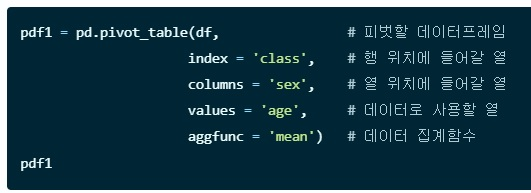

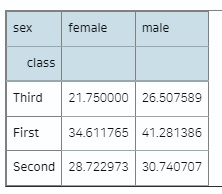

핸드폰 가격 예측데이터

데이터 출처 :https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv(참고, 데이터 수정)

데이터 설명 : 핸드폰 가격예측 (price_range컬럼 0(저렴) ~3(매우비쌈) 범위 )

Data url https://raw.githubusercontent.com/Datamanim/datarepo/main/mobile/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/mobile/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df_group = df.groupby(by=["price_range", "n_cores"]).size().to_frame('size').sort_values(by="size", ascending=False).reset_index().drop_duplicates(subset="price_range", keep="first").sort_values(by="size").reset_index(drop=True)

print(df_group)

   price_range  n_cores  size
0            0        2    69
1            3        5    70
2            2        4    73
3            1        4    76


In [ ]:
df_pr3 = df.loc[df.price_range == 3]

df_pr3 = df_pr3.corr().unstack().sort_values(ascending=False).reset_index().dropna()

df_pr3 = df_pr3.loc[df_pr3[0] != 1].reset_index()

print(df_pr3.iloc[1])

index            21
level_0          pc
level_1          fc
0          0.635166
Name: 1, dtype: object


비행탑승 경험 만족도 데이터

데이터 출처 :https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction?select=train.csv (참고, 데이터 수정)

데이터 설명 : 비행탑승 경험 만족도 (satisfaction 컬럼 : ‘neutral or dissatisfied’ or satisfied ) (83123, 24) shape

Data url :https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/train.csv")
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,55882,Male,Loyal Customer,42,Business travel,Business,473,1,1,3,...,5,5,5,5,3,5,3,3,0.0,satisfied
1,31906,Female,Loyal Customer,31,Business travel,Business,3271,4,4,4,...,3,3,5,5,3,4,3,1,5.0,satisfied
2,85481,Male,Loyal Customer,51,Personal Travel,Eco,214,5,0,5,...,3,4,4,4,4,4,3,2,0.0,satisfied
3,102134,Male,Loyal Customer,44,Business travel,Business,3097,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
4,31580,Male,Loyal Customer,33,Business travel,Business,3286,1,1,1,...,4,2,5,2,5,1,4,0,0.0,satisfied


In [ ]:
df2 = df.loc[pd.isna(df['Arrival Delay in Minutes'])]

df2_filt = df2.groupby(by=["Class", "satisfaction"]).size().unstack()

result92 = df2_filt.loc[df2_filt['neutral or dissatisfied'] < df2_filt['satisfied']]

display(result92)

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,36,76


수질 음용성 여부 데이터

데이터 출처 :https://www.kaggle.com/adityakadiwal/water-potability

데이터 설명 : 수질 음용성 여부 (Potablillity 컬럼 : 0 ,1 )

Data url :https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/train.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.918150,214.186611,23823.492888,7.290878,341.173322,411.424483,19.585002,25.057375,4.028958,0
1,5.422446,205.266080,18542.957451,5.491963,306.702227,382.080129,10.504023,67.493450,2.911751,1
2,7.341547,187.672402,21273.457066,7.784003,NaN,332.084293,16.842334,55.019151,4.025644,0
3,9.056245,197.666301,17403.532167,7.688917,337.460176,414.766631,15.349869,63.696746,3.319354,0
4,5.039374,142.860598,40829.353167,7.271543,NaN,386.803057,16.823773,52.297113,4.957420,0


In [ ]:
df2 = df.loc[~(pd.isna(df.ph))]

df2_quarter = df2.loc[df2.ph <= df2.ph.quantile(.25)]

print(df2_quarter.ph.mean())

5.057093462441731


사분위수 구하기

dataframe.quantile()

각각 .25 .50 .75 1.0을 입력하면 1,2,3,4분위 수를 얻을 수 있다.

의료 비용 예측 데이터

데이터 출처 :https://www.kaggle.com/mirichoi0218/insurance/code(참고, 데이터 수정)

데이터 설명 : 의료비용 예측문제

Data url :https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/train.csv

In [ ]:
import pandas as pd
train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/train.csv")
train.head()

,age,sex,bmi,children,smoker,region,charges
0,64,female,39.330,0,no,northeast,14901.51670
1,47,female,27.830,0,yes,southeast,23065.42070
2,52,female,33.300,2,no,southwest,10806.83900
3,33,female,22.135,1,no,northeast,5354.07465
4,30,male,31.400,1,no,southwest,3659.34600


In [ ]:
df_smoker = train.loc[train.smoker == 'yes']
df_nonsmoker = train.loc[train.smoker == 'no']

df_smoker_10 = df_smoker.loc[df_smoker.charges >= df_smoker.charges.quantile(.90)]
df_nonsmoker_10 = df_nonsmoker.loc[df_nonsmoker.charges >= df_nonsmoker.charges.quantile(.90)]

print(df_smoker_10.charges.mean() - df_nonsmoker_10.charges.mean())

29297.954548156144


킹카운티 주거지 가격예측문제 데이터

데이터 출처 :https://www.kaggle.com/harlfoxem/housesalesprediction (참고, 데이터 수정)

데이터 설명 : 킹카운티 주거지 가격 예측문제

Data url :https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice//train.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8961990160,20150413T000000,567500.0,3,2.5,2080,4556,2.0,0,0,...,8,2080,0,1999,0,98074,47.6036,-122.014,1530,5606
1,9455200205,20140604T000000,525000.0,3,2.0,1540,7800,1.0,0,0,...,8,1540,0,2004,0,98125,47.7041,-122.288,1510,7800
2,7853220670,20140918T000000,540000.0,3,2.5,2860,8935,2.0,0,0,...,8,2860,0,2004,0,98065,47.5336,-121.855,2650,6167
3,3298201170,20141110T000000,350000.0,3,1.0,940,7811,1.0,0,0,...,6,940,0,1959,0,98008,47.6195,-122.118,1180,7490
4,7972604355,20140521T000000,218000.0,3,1.0,1020,7874,1.0,0,0,...,7,1020,0,1956,0,98106,47.5175,-122.346,1290,7320


In [ ]:
df_max = df.bedrooms.value_counts().to_frame().sort_values(by="bedrooms", ascending=False).index[0]

df_bdmx = df.loc[df.bedrooms == df_max]

print(df_bdmx.price.quantile(0.9) - df_bdmx.price.quantile(0.1))

505500.0


대학원 입학가능성 데이터

데이터 출처 :https://www.kaggle.com/mohansacharya/graduate-admissions(참고, 데이터 수정)

데이터 설명 : 대학원 입학 가능성 예측

Data url :https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/train.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,246,328,110,4,4.0,2.5,9.02,1,0.81
1,100,323,113,3,4.0,4.0,8.88,1,0.79
2,79,296,95,2,3.0,2.0,7.54,1,0.44
3,53,334,116,4,4.0,3.0,8.00,1,0.78
4,444,321,114,5,4.5,4.5,9.16,1,0.87


In [ ]:
from sklearn.ensemble import RandomForestRegressor

df2 = df.iloc[::, 1::]

rfr = RandomForestRegressor()

x_train = df2.iloc[::, 0:-1:1]
y_train = df2.iloc[::, -1:-2:-1]

rfr.fit(x_train, y_train)

importance = pd.DataFrame({'importance':rfr.feature_importances_},  x_train.columns)
importance

<ipython-input-14-bed07ea8f96e>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train, y_train)


,importance
GRE Score,0.078949
TOEFL Score,0.036516
University Rating,0.013392
SOP,0.023864
LOR,0.025839
CGPA,0.814270
Research,0.007171


레드 와인 퀄리티 예측 데이터

데이터 출처 :https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009(참고, 데이터 수정)

데이터 설명 : 레드 와인 퀄리티 예측문제
Data url :https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/train.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6
1,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
2,7.1,0.36,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4,5
3,7.6,0.29,0.49,2.7,0.092,25.0,60.0,0.99710,3.31,0.61,10.1,6
4,7.7,0.51,0.28,2.1,0.087,23.0,54.0,0.99800,3.42,0.74,9.2,5


In [ ]:
df_q3 = df.loc[df.quality == 3]
df_q8 = df.loc[df.quality == 8]

df_std3 = df_q8.std() - df_q3.std()

print(df_std3.sort_values(ascending=False).index[0])

total sulfur dioxide


약물 분류 데이터

데이터 출처 :https://www.kaggle.com/prathamtripathi/drug-classification(참고, 데이터 수정)

데이터 설명 : 투약하는 약을 분류

Data url :https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/train.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,20,F,NORMAL,NORMAL,9.281,4
1,24,M,HIGH,NORMAL,9.475,1
2,34,M,NORMAL,HIGH,22.456,0
3,17,M,NORMAL,NORMAL,10.832,4
4,72,M,LOW,HIGH,16.310,0


In [ ]:
df['Age2'] = (df['Age'] // 10) * 10

result98 = df.groupby(by="Age2").Na_to_K.mean().to_frame()

display(result98)

,Na_to_K
Age2,
10,17.603111
20,17.220038
30,15.656500
40,14.985273
50,15.810231
60,16.226045
70,14.413364


사기회사 분류 데이터

데이터 출처 :https://www.kaggle.com/sid321axn/audit-data(참고, 데이터 수정)

데이터 설명 : 사기회사 분류

Data url :https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/train.csv")
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,2.72,14,4.53,0.6,2.718,87.93,0.6,52.758,92.46,5.0,...,0.4,0,0.2,0.0,4.0,108.362,0.4,0.5,21.6724,1
1,3.41,16,12.68,0.6,7.608,41.00,0.6,24.600,53.68,5.5,...,0.4,0,0.2,0.0,4.4,41.936,0.4,0.5,8.3872,1
2,2.72,11,3.11,0.6,1.866,113.97,0.6,68.382,117.08,5.5,...,0.4,0,0.2,0.0,4.4,88.832,0.4,0.5,17.7664,1
3,3.41,8,1.12,0.4,0.448,0.00,0.2,0.000,1.12,5.0,...,0.4,0,0.2,0.0,2.2,1.848,0.4,0.5,0.3696,0
4,55.57,9,1.06,0.4,0.424,0.00,0.2,0.000,1.06,5.0,...,0.4,0,0.2,0.0,2.2,1.824,0.4,0.5,0.3648,0


In [ ]:
df_risk = df.groupby(by="Risk")[["Score_A", "Score_B"]].mean()

display(df_risk)

,Score_A,Score_B
Risk,,
0,0.262234,0.225532
1,0.490164,0.444262


센서데이터 동작유형 분류 데이터

데이터 출처 :https://www.kaggle.com/kyr7plus/emg-4(참고, 데이터 수정)

데이터 설명 : 센서데이터로 동작 유형 분류

Data url :https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/train.csv")
df.head()

,motion_0,motion_1,motion_2,motion_3,motion_4,motion_5,motion_6,motion_7,motion_8,motion_9,motion_10,motion_11,motion_12,motion_13,motion_14,motion_15,motion_16,motion_17,motion_18,motion_19,motion_20,motion_21,motion_22,motion_23,motion_24,...,motion_40,motion_41,motion_42,motion_43,motion_44,motion_45,motion_46,motion_47,motion_48,motion_49,motion_50,motion_51,motion_52,motion_53,motion_54,motion_55,motion_56,motion_57,motion_58,motion_59,motion_60,motion_61,motion_62,motion_63,pose
0,-6.0,8.0,5.0,6.0,-12.0,-27.0,5.0,24.0,-8.0,-5.0,-3.0,-2.0,5.0,13.0,-3.0,-13.0,10.0,-3.0,-1.0,-1.0,-2.0,6.0,-1.0,-1.0,-9.0,...,11.0,-2.0,1.0,1.0,-8.0,9.0,1.0,3.0,-19.0,-2.0,1.0,3.0,-8.0,-11.0,0.0,-1.0,-3.0,-6.0,-9.0,-7.0,36.0,68.0,3.0,-3.0,1
1,-32.0,-3.0,-4.0,-5.0,-1.0,16.0,0.0,-5.0,42.0,2.0,0.0,-3.0,-14.0,-23.0,-5.0,-14.0,3.0,-4.0,-4.0,-4.0,11.0,9.0,-2.0,4.0,-13.0,...,-9.0,3.0,-1.0,-1.0,13.0,19.0,0.0,3.0,-6.0,-7.0,1.0,-4.0,19.0,20.0,-3.0,-17.0,-12.0,-1.0,-1.0,0.0,-26.0,-11.0,-4.0,-9.0,1
2,35.0,-2.0,-1.0,1.0,-25.0,-16.0,-3.0,-20.0,10.0,1.0,1.0,-1.0,22.0,20.0,13.0,39.0,-5.0,10.0,0.0,8.0,2.0,6.0,2.0,-2.0,-6.0,...,14.0,3.0,7.0,12.0,6.0,-19.0,-24.0,-10.0,-12.0,-14.0,7.0,12.0,14.0,2.0,4.0,6.0,-65.0,6.0,-10.0,-31.0,-19.0,-3.0,-47.0,-17.0,0
3,-15.0,-6.0,-3.0,-5.0,27.0,37.0,-2.0,-2.0,19.0,5.0,2.0,4.0,-19.0,4.0,1.0,-1.0,24.0,2.0,0.0,0.0,-2.0,-25.0,-2.0,6.0,-1.0,...,-12.0,0.0,1.0,-2.0,-14.0,-17.0,-4.0,-13.0,5.0,1.0,1.0,4.0,16.0,4.0,-1.0,2.0,11.0,0.0,-2.0,-4.0,-7.0,15.0,3.0,14.0,1
4,60.0,3.0,0.0,-7.0,-6.0,-10.0,-6.0,7.0,-11.0,-4.0,0.0,1.0,-8.0,-4.0,-4.0,-6.0,-9.0,-2.0,-4.0,0.0,12.0,2.0,-7.0,-4.0,52.0,...,-29.0,1.0,-1.0,2.0,6.0,-2.0,-6.0,-5.0,20.0,3.0,-4.0,-25.0,4.0,-5.0,10.0,-12.0,17.0,-3.0,1.0,2.0,-2.0,20.0,18.0,10.0,0


In [ ]:
df_pose = df.groupby(by="pose").median().T

df_pose['gap'] = abs(df_pose[0] - df_pose[1])

df_gap_max = df_pose.sort_values(by="gap", ascending=False).gap.values[0]

result100 = df_pose.loc[df_pose.gap == df_gap_max]

display(result100.index.tolist())

['motion_54', 'motion_62']

.T => 행/열을 바꿈

현대 차량 가격 분류문제 데이터

데이터 출처 :https://www.kaggle.com/mysarahmadbhat/hyundai-used-car-listing(참고, 데이터 수정)

데이터 설명 : 현대 차량가격 분류문제

Data url :hhttps://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/train.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,Tucson,2016,12795,Manual,36263,Diesel,30,61.7,1.7
1,I10,2012,3995,Manual,22089,Petrol,20,61.4,1.2
2,I30,2019,24000,Manual,555,Petrol,145,34.0,2.0
3,Tucson,2017,12995,Manual,32147,Diesel,30,61.7,1.7
4,Tucson,2018,14991,Semi-Auto,32217,Diesel,150,57.6,1.7


In [ ]:
carlist = df.groupby(by="model").size().to_frame('size').sort_values(by="size", ascending=False).head(3).index.tolist()

df2 = df.loc[df.model.isin(carlist)]

result101 = df2.groupby(by="model").price.mean().to_frame('price')

display(result101)

,price
model,
I10,7646.137891
I30,11651.821759
Tucson,15805.441373


당뇨여부판단 데이터

데이터 출처 :https://www.kaggle.com/pritsheta/diabetes-dataset(참고, 데이터 수정)

데이터 설명 : 당뇨여부 판단하기

Data url :https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/train.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/train.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,102,74,0,0,29.5,0.121,32,0
1,2,144,58,33,135,31.6,0.422,25,1
2,5,136,82,0,0,0.0,0.640,69,0
3,13,145,82,19,110,22.2,0.245,57,0
4,1,117,60,23,106,33.8,0.466,27,0


In [ ]:
df_0 = df.loc[df.Outcome == 0]
df_1 = df.loc[df.Outcome == 1]

print(df_1.mean() - df_0.mean())

Pregnancies                  1.574159
Glucose                     29.943995
BloodPressure                3.202079
SkinThickness                2.952033
Insulin                     33.398645
BMI                          4.541437
DiabetesPedigreeFunction     0.143646
Age                          5.866939
Outcome                      1.000000
dtype: float64


넷플릭스 주식 데이터

데이터 출처 :https://www.kaggle.com/pritsheta/netflix-stock-data-from-2002-to-2021(참고, 데이터 수정)

데이터 설명 : 넷플릭스 주식데이터

Data url :https://raw.githubusercontent.com/Datamanim/datarepo/main/nflx/NFLX.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/nflx/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [ ]:
from datetime import datetime

df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.strftime('%Y-%m')

df['Date'] = pd.to_datetime(df['Date'])

df_may = df.loc[df['Date'].dt.month == 5]

df_may['Date'] = df_may['Date'].dt.strftime('%Y-%m')

result103 = df_may.groupby(by="Date").Open.mean()

display(result103)

<ipython-input-94-efa67c78556d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may['Date'] = df_may['Date'].dt.strftime('%Y-%m')


Date
2002-05      1.155833
2003-05      1.641497
2004-05      4.261143
2005-05      1.951905
2006-05      4.163571
2007-05      3.159351
2008-05      4.435034
2009-05      5.790571
2010-05     14.417071
2011-05     34.650272
2012-05     10.523247
2013-05     31.936429
2014-05     51.121292
2015-05     85.057429
2016-05     92.705715
2017-05    158.255455
2018-05    329.779541
2019-05    359.664548
2020-05    433.880499
2021-05    496.923996
Name: Open, dtype: float64

nba 선수 능력치 데이터

데이터 출처 :https://www.kaggle.com/datasets/vivovinco/nba-player-stats(참고, 데이터 수정)

Data url :https://raw.githubusercontent.com/Datamanim/datarepo/main/nba/nba.csv

In [ ]:
pd.set_option('display.max_columns',50)
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/nba/nba.csv",encoding='latin',sep=';')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [ ]:
df_TOR = df.loc[df.Tm == "TOR"]

result104 = round(df_TOR.Age.mean(), 4)

print(result104)

24.8696


In [ ]:
age_min = df.Age.min()

df_min = df.loc[df.Age == age_min]

df_many = df_min.groupby(by="Pos").size().to_frame('size')

result105 = df_many.sort_values(by="size", ascending=False).index[0]

print(result105)

SG


In [ ]:
df['first_name'] = df.Player.str.split(" ").str[0]

result106 = df.groupby(by="first_name").size().to_frame('size').sort_values(by="size", ascending=False)

display(result106.iloc[0])

size    14
Name: Justin, dtype: int64

In [ ]:
result107 = df.groupby(by="Pos").PTS.mean()

print(result107)

Pos
C         7.690769
C-PF     12.850000
PF        7.737500
PF-SF     8.500000
PG        8.325161
PG-SG    22.000000
SF        7.270253
SF-SG     8.660000
SG        7.810553
SG-PG     9.525000
SG-SF     7.360000
Name: PTS, dtype: float64


In [ ]:
df2 = df[["Tm","G"]].sort_values(by="G", ascending=False).drop_duplicates(subset="Tm", keep="first")

print(df2.G.mean())

77.51612903225806


In [ ]:
df_cond = df.loc[(df.Tm == "MIA") & (df.Pos.isin(["C", "PF"]))]

print(df_cond.MP.mean())

16.7875


In [ ]:
df_g15 = df.loc[df.G >= df.G.mean()*1.5]

print(df_g15['3P'].mean())

1.3853658536585365


In [ ]:
df_avgup = df.loc[df.Age >= df.Age.mean()]
df_avgdw = df.loc[df.Age < df.Age.mean()]

print(df_avgup.G.mean() - df_avgdw.G.mean())

3.787674551781862


In [ ]:
df_ageavg = df.groupby("Tm").Age.mean().to_frame('AgeAvg')

print(df_ageavg.sort_values(by="AgeAvg").index[0])

MEM


In [ ]:
display(df.groupby(by="Pos").MP.mean())

Pos
C        16.990000
C-PF     25.350000
PF       17.937500
PF-SF    27.300000
PG       19.547742
PG-SG    37.200000
SF       17.514557
SF-SG    20.340000
SG       18.554271
SG-PG    22.950000
SG-SF    19.620000
Name: MP, dtype: float64